In [725]:
import pandas as pd
import missingno as msno

In [726]:
data = pd.read_csv("Disney.csv", delimiter=',')

In [727]:
data

,Unnamed: 0,title,Production company,Release date,Running time,Country,Language,Running time (int),Budget (float),Box office (float),...,Box office,Story by,Narrated by,Cinematography,Edited by,Screenplay by,Production companies,Adaptation by,Traditional,Simplified
0,0,Academy Award Review of,Walt Disney Productions,"['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,41.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Snow White and the Seven Dwarfs,Walt Disney Productions,"['December 21, 1937 ( Carthay Circle Theatre ,...",83 minutes,United States,English,83.0,1490000.0,418000000.0,...,$418 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Pinocchio,Walt Disney Productions,"['February 7, 1940 ( Center Theatre )', 'Febru...",88 minutes,United States,English,88.0,2600000.0,164000000.0,...,$164 million,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Fantasia,Walt Disney Productions,"['November 13, 1940']",126 minutes,United States,English,126.0,2280000.0,83300000.0,...,$76.4–$83.3 million,"['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,NaN
4,4,The Reluctant Dragon,Walt Disney Productions,"['June 20, 1941']",74 minutes,United States,English,74.0,600000.0,960000.0,...,"$960,000 (worldwide rentals)",NaN,NaN,Bert Giennon,Paul Weatherwax,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,Soul,"['Walt Disney Pictures', 'Pixar Animation Stud...","['October 15, 2020 ( Rome Film Festival )', 'N...",NaN,United States,English,NaN,150000000.0,NaN,...,NaN,Pete Docter,NaN,NaN,NaN,"['Pete Docter', 'Mike Jones', 'Kemp Powers']",NaN,NaN,NaN,NaN
428,428,Raya and the Last Dragon,"['Walt Disney Pictures', 'Walt Disney Animatio...","['March 12, 2021']",NaN,United States,English,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,429,Cruella,"['Walt Disney Pictures', 'Gunn Films', 'Marc P...","['May 28, 2021 (United States)']",NaN,United States,English,NaN,NaN,NaN,...,NaN,NaN,NaN,Nicolas Karakatsanis,Tatiana S. Riegel,"['Aline Brosh McKenna', 'Jez Butterworth', 'Da...",NaN,NaN,NaN,NaN
430,430,Jungle Cruise,"['Walt Disney Pictures', 'Davis Entertainment'...","['July 30, 2021 (United States)']",NaN,United States,English,NaN,NaN,NaN,...,NaN,"['Glenn Ficarra', 'John Requa']",NaN,Flavio Labiano,Joel Negron,"['Michael Green', 'Glenn Ficarra', 'John Requa']",NaN,NaN,NaN,NaN


In [728]:
data = data.drop(columns=["Unnamed: 0",	"title", "Production company", "Release date", "Running time", "Country",	"Language",	"Running time",	"Budget", "Box office", "Story by", "Narrated by", "Cinematography", "Edited by", "Screenplay by", "Production companies", "Adaptation by", "Traditional", "Simplified", "rotten_tomatoes", "Release date (datetime)", "Directed by", "Produced by", "Written by", "Based on","Starring", "Music by", "Distributed by", "Running time (int)"])
data = data.dropna()
data

,Budget (float),Box office (float),imdb,metascore
1,1490000.0,4.180000e+08,7.6,95.0
2,2600000.0,1.640000e+08,7.4,99.0
3,2280000.0,8.330000e+07,7.8,96.0
5,950000.0,1.300000e+06,7.2,96.0
6,858000.0,2.674000e+08,7.3,91.0
...,...,...,...,...
409,250000000.0,1.657000e+09,8.5,88.0
410,185000000.0,4.917000e+08,6.6,43.0
413,150000000.0,1.450000e+09,6.9,64.0
416,175000000.0,1.364000e+08,7.4,61.0


In [729]:
data = data.loc[data["Budget (float)"] != 0]
data = data.loc[data["Box office (float)"] != 0]
data = data.loc[data["imdb"] != 0]
data = data.loc[data["metascore"] != 0]
data

,Budget (float),Box office (float),imdb,metascore
1,1490000.0,4.180000e+08,7.6,95.0
2,2600000.0,1.640000e+08,7.4,99.0
3,2280000.0,8.330000e+07,7.8,96.0
5,950000.0,1.300000e+06,7.2,96.0
6,858000.0,2.674000e+08,7.3,91.0
...,...,...,...,...
409,250000000.0,1.657000e+09,8.5,88.0
410,185000000.0,4.917000e+08,6.6,43.0
413,150000000.0,1.450000e+09,6.9,64.0
416,175000000.0,1.364000e+08,7.4,61.0


<AxesSubplot:>

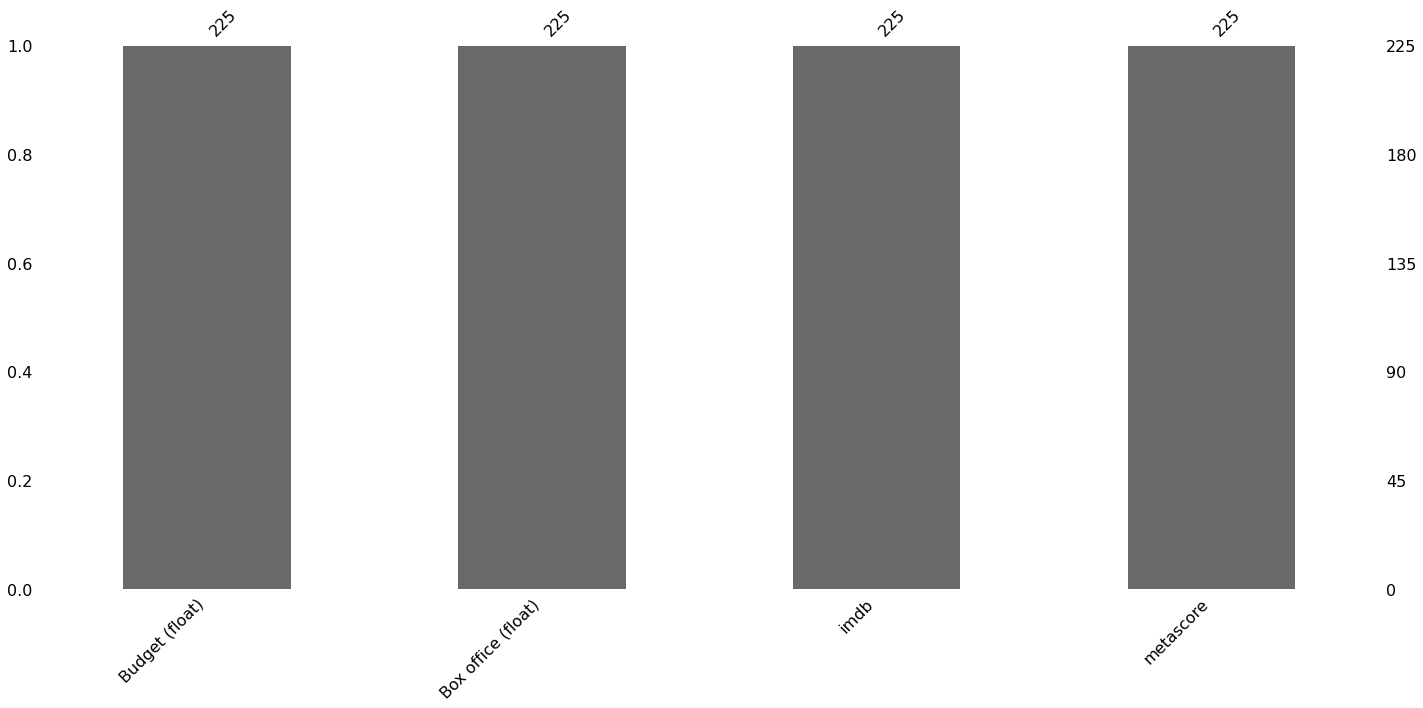

In [730]:
msno.bar(data)

In [731]:
data = data.dropna()

In [732]:
# ML

In [733]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [734]:
x_features = ["metascore", "Box office (float)", "Budget (float)"]
y_feature = 'imdb'


In [735]:
x_train, x_test, y_train, y_test = train_test_split(data[x_features].to_numpy(), data[y_feature].to_numpy(), train_size = 0.75)

In [736]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.6307700922730526

In [737]:
mean_squared_error(y_test, reg.predict(x_test), squared=False) # MSE

0.8059211746181381

In [738]:
pd.DataFrame.from_records(data=[list(y_test), list(reg.predict(x_test))])

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,6.500000,7.200000,7.100000,6.500000,8.400000,7.400000,6.700000,6.900000,6.100000,6.900000,...,4.500000,7.300000,7.70000,4.700000,7.800000,8.400000,7.600000,6.800000,6.000000,5.400000
1,6.174148,6.469533,6.377486,6.806257,8.216169,6.757302,5.671785,6.987708,6.000693,6.590099,...,5.879068,7.247007,7.27898,5.481828,7.633662,7.737198,7.673337,6.924928,5.994755,5.385204


In [739]:
diff = np.abs(reg.predict(x_test) - y_test) 
mx = np.max(diff)


<BarContainer object of 10 artists>

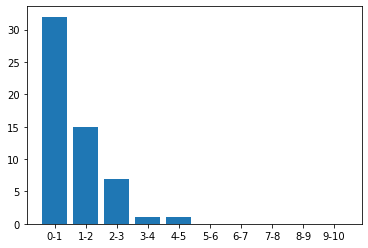

In [740]:
NUM_CLUSTERS = 10

cluster_value = mx / NUM_CLUSTERS
clusters = []
for i in range(NUM_CLUSTERS):
  filer_arr1 = diff < (i+ 1) * cluster_value
  filer_arr2 = diff >= i * cluster_value
  filter_arr = filer_arr1 & filer_arr2
  clusters.append(len(diff[filter_arr]))
x = [f"{i}-{i+1}" for i in range(10)]
plt.bar(x, clusters)